In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BreachedData = pd.read_excel('Data_Breach_Pooled_Data_April_7_2019.xlsx')

In [4]:
BreachedData[BreachedData['Student.Name']=='Claire Li'].head()

,Student.Name,Student.EID,Student.Email.address,BreachNo.,TICKER,YEAR.of.BREACH.,BreachID,Firm.Name,Year.of.Data,t,...,Advertising.Intensity,Foreign.Operations,Corporate.Restructuring,SIC.Code,Name.of.Primary.SIC.industry,CountOfSegments,Breach.Type,Type.of.organization,Total.Records,BreachDescription
580,Claire Li,bl26377,bingqing.li@utexas.edu,123,CELG,2007,CELG2007,CELGENE CORP,2006,-1,...,0.0,0.0,0.0,2834.0,PHARMACEUTICAL PREPARATIONS,1.0,NaN,NaN,NaN,NaN
581,Claire Li,bl26377,bingqing.li@utexas.edu,123,CELG,2007,CELG2007,CELGENE CORP,2007,0,...,0.0,0.0,0.0,2834.0,PHARMACEUTICAL PREPARATIONS,1.0,PORT,BSR,1951.0,Four external computer hard drives used to bac...
582,Claire Li,bl26377,bingqing.li@utexas.edu,123,CELG,2007,CELG2007,CELGENE CORP,2008,1,...,0.0,1.0,0.0,2834.0,PHARMACEUTICAL PREPARATIONS,1.0,NaN,NaN,NaN,NaN
583,Claire Li,bl26377,bingqing.li@utexas.edu,123,CELG,2007,CELG2007,CELGENE CORP,2009,2,...,0.0,1.0,0.0,2834.0,PHARMACEUTICAL PREPARATIONS,1.0,NaN,NaN,NaN,NaN
584,Claire Li,bl26377,bingqing.li@utexas.edu,123,CELG,2007,CELG2007,CELGENE CORP,2010,3,...,0.0,1.0,0.0,2834.0,PHARMACEUTICAL PREPARATIONS,1.0,NaN,NaN,NaN,NaN


In [5]:
BreachedData.shape

(2425, 108)

In [6]:
# Number of cases
len(BreachedData['BreachID'].unique())

485

# Word Cloud

In [7]:
# word frequency on Breach Description
# grab word frequency using nltk library
import nltk
# stop words
from nltk.corpus import stopwords    

In [8]:
BreachDescription = BreachedData.BreachDescription

In [9]:
BreachDescription = BreachDescription[~pd.isnull(BreachDescription)] 

In [10]:
BreachDescription.head()

1     1-800-Flowers customer service received report...
6     The Bank's third-party payment service provide...
11    The US Federal Trade Commission filed a compla...
16    Backup tapes with information from Ophthalmolo...
21    name, address, payment card info\r\r\nLocation...
Name: BreachDescription, dtype: object

In [11]:
# It's weird that the rows of description does not align with the rows of unique breach ID. 
# I later noticed that some descriptions repeat and stay the same in consecutive data breaches and took multiple lines
BreachDescription.shape

(740,)

In [12]:
BreachDescription = BreachDescription.str.lower().to_string()
# Alternative code: text = " ".join(review for review in df.description)

In [13]:
print ("There are {} words in the combination of all descriptions.".format(len(BreachDescription)))

There are 42919 words in the combination of all descriptions.


In [14]:
# tokenize the text () should be string
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(BreachDescription)

In [15]:
# let's do a word count
from collections import Counter

# counter object
words = Counter()

# update counter with new words
words.update(tokens)

In [16]:
# first order check
words.most_common()[:10]

[('a', 374),
 ('r', 303),
 ('of', 181),
 ('n', 136),
 ('the', 132),
 ('an', 110),
 ('was', 93),
 ('employee', 89),
 ('to', 88),
 ('s', 86)]

In [17]:
# store the stop words
stopwords = stopwords.words('english')[:]

In [18]:
# lets do this again: remove stop words, single letter variable names
filter_words = Counter(x for x in tokens if x not in stopwords and x.isdigit() == False and len(x) != 1 and x.isalpha() == True)

In [19]:
filter_words.most_common()[:20]

[('employee', 89),
 ('laptop', 85),
 ('information', 76),
 ('stolen', 53),
 ('customers', 51),
 ('containing', 44),
 ('data', 38),
 ('computer', 34),
 ('location', 31),
 ('breached', 31),
 ('customer', 29),
 ('notified', 29),
 ('former', 29),
 ('personal', 25),
 ('breach', 25),
 ('inc', 20),
 ('company', 20),
 ('card', 19),
 ('names', 19),
 ('sent', 19)]

In [20]:
# check Employee for employee negligence/error leads to the breach or employee information is leaked
from nltk.util import ngrams
bgs = list(ngrams(tokens,2))
bgs[:5]

[('1', '1'),
 ('1', '800'),
 ('800', 'flowers'),
 ('flowers', 'customer'),
 ('customer', 'service')]

In [21]:
# lets do this again: remove stop words, single letter variable names
# x中有1个word满足if就会录入filter_bgs
filter_bgs = Counter(x for x in bgs for i in x if i not in stopwords and i.isdigit() == False and len(i) != 1 and i.isalpha() == True)

In [22]:
filter_bgs.most_common()[1]

(('a', 'laptop'), 61)

In [23]:
for dict in filter_bgs.most_common()[:50]:
    if 'employee' in dict[0]:
        print(dict)

(('an', 'employee'), 50)
(('employee', 's'), 16)
(('employee', 'used'), 12)
(('former', 'employee'), 12)
(('dishonest', 'employee'), 12)


In [ ]:
# Create word cloud
# git clone https://github.com/amueller/word_cloud.git
# cd word_cloud
# pip3 install .

In [24]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["may", "one", "inc", 'breach','data','breached'])

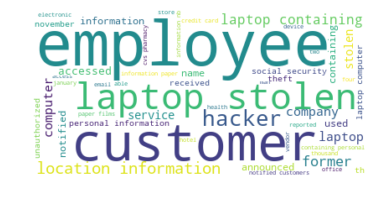

In [26]:
# Create and generate a word cloud image:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=stopwords, max_words=50, background_color="white").generate(BreachDescription)
# Display the generated image:
plt.figure()
# interpolation="bilinear" is to make the displayed image appear more smoothly
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [61]:
# Save the image in the img folder:
wordcloud.to_file("WordCloud.png")

# Breach Type

In [93]:
BreachType = BreachedData['Breach.Type'].dropna()
BreachType.head()

1     HACK
6     UNKN
11    DISC
16    PORT
21    HACK
Name: Breach.Type, dtype: object

In [94]:
# Drop a row if it contains a certain value 
BreachType = BreachType[BreachType != 'UNKN']
BreachType.head()

1     HACK
11    DISC
16    PORT
21    HACK
26    PHYS
Name: Breach.Type, dtype: object

In [101]:
typeCount = BreachType.value_counts()
typeCount

HACK    210
PORT    156
DISC    132
INSD    105
PHYS     57
CARD     29
STAT     19
Name: Breach.Type, dtype: int64

In [63]:
BreachedData['Breach.Type'].unique()

array([nan, 'HACK', 'UNKN', 'DISC', 'PORT', 'PHYS', 'INSD', 'STAT',
       'CARD'], dtype=object)

In [143]:
print(typeCount.index)
print(BreachType.unique())
print(len(BreachType.unique()))

Index(['HACK', 'PORT', 'DISC', 'INSD', 'PHYS', 'CARD', 'STAT'], dtype='object')
['HACK' 'DISC' 'PORT' 'PHYS' 'INSD' 'STAT' 'CARD']
7


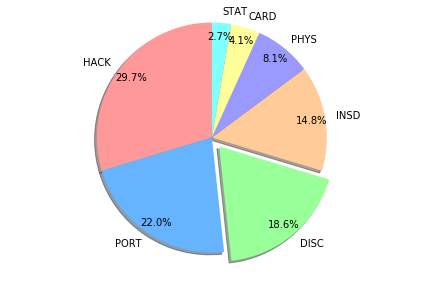

In [145]:
# Pie chart
labels = typeCount.index
sizes = BreachType.value_counts() #typeCount
# only "explode" the 2nd slice
explode = (0, 0,0.1,0,0,0,0)  
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#9999ff','#ffff99','#80ffff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90, pctdistance=0.88)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [122]:
BreachType.value_counts().DISC

132

In [131]:
typeCount.drop('DISC')

HACK    210
PORT    156
INSD    105
PHYS     57
CARD     29
STAT     19
Name: Breach.Type, dtype: int64

In [129]:
sum(typeCount.drop('DISC'))

576

## unintentional vs intentional

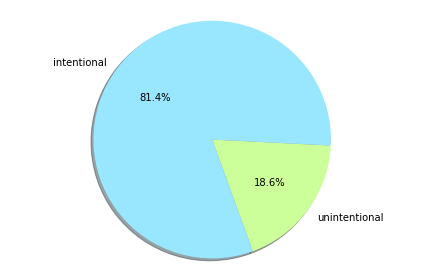

In [148]:
# define DISC as unintentional
# Pie chart
labels2 = ['unintentional', 'intentional']
sizes2 = [BreachType.value_counts().DISC, sum(typeCount.drop('DISC'))]
colors2 = ['#ccff99','#99e6ff']
fig2, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', colors=colors2,
        shadow=True, startangle=290)
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.show()

In [14]:
df_t0 = BreachedData[BreachedData.t==0]
df_t0.head()

,Student.Name,Student.EID,Student.Email.address,BreachNo.,TICKER,YEAR.of.BREACH.,BreachID,Firm.Name,Year.of.Data,t,...,Advertising.Intensity,Foreign.Operations,Corporate.Restructuring,SIC.Code,Name.of.Primary.SIC.industry,CountOfSegments,Breach.Type,Type.of.organization,Total.Records,BreachDescription
1,Lovekesh Bansal,lb35533,lovekesh@utexas.edu,1,FLWS,2016,FLWS2016,1-800-FLOWERS.COM,2016,0,...,0.262777,0.0,0.0,5992.0,FLORISTS,2.0,HACK,BSO,0.0,1-800-Flowers customer service received report...
6,Lovekesh Bansal,lb35533,lovekesh@utexas.edu,2,SRCE,2010,SRCE2010,1ST SOURCE CORP,2010,0,...,0.000849,0.0,0.0,6020.0,COMMERCIAL AND STOCK SAVINGS BANKS,NaN,UNKN,BSF,0.0,The Bank's third-party payment service provide...
11,Aparna Aidith,aa79444,aparna.aidith@utexas.edu,3,AAN,2013,AAN2013,AARON'S INC,2013,0,...,0.023534,1.0,0.0,7359.0,"SERVICES-EQUIPMENT RENTAL & LEASING, NEC",7.0,DISC,BSR,0.0,The US Federal Trade Commission filed a compla...
16,Aparna Aidith,aa79444,aparna.aidith@utexas.edu,4,ABT,2011,ABT2011,ABBOTT LABORATORIES,2011,0,...,0.000000,1.0,1.0,2834.0,PHARMACEUTICAL PREPARATIONS,4.0,PORT,MED,0.0,Backup tapes with information from Ophthalmolo...
21,Aparna Aidith,aa79444,aparna.aidith@utexas.edu,5,ABT,2017,ABT2017,ABBOTT LABORATORIES,2017,0,...,0.000000,1.0,1.0,2834.0,PHARMACEUTICAL PREPARATIONS,3.0,HACK,MED,0.0,"name, address, payment card info\r\r\nLocation..."


In [81]:
df_t0.shape

(485, 108)

In [187]:
CEODiffTime = df_t0[['BreachAnnounceDate','BreachDiscoveryDate','BreachDate','CEODuality']].dropna()
CEODiffTime.head()

,BreachAnnounceDate,BreachDiscoveryDate,BreachDate,CEODuality
966,2018-09-28 00:00:00,2018-09-28 00:00:00,2018-09-28 00:00:00,1.0
1346,2018-06-15 00:00:00,2018-06-15 00:00:00,2018-05-13 00:00:00,0.0
131,2018-08-28 00:00:00,2018-08-02 00:00:00,2017-09-08 00:00:00,1.0
451,2018-02-13 00:00:00,2017-12-15 00:00:00,2017-11-21 00:00:00,0.0
2276,2018-07-27 00:00:00,2018-04-17 00:00:00,2017-12-20 00:00:00,0.0


In [188]:
import datetime
CEODiffTime = CEODiffTime[CEODiffTime['BreachAnnounceDate'].apply(lambda x: type(x) == datetime.datetime)]
CEODiffTime = CEODiffTime[CEODiffTime['BreachDiscoveryDate'].apply(lambda x: type(x) == datetime.datetime)]
CEODiffTime = CEODiffTime[CEODiffTime['BreachDate'].apply(lambda x: type(x) == datetime.datetime)]

In [189]:
CEODiffTime.shape

(367, 4)

In [192]:
CEODiffTime['Diff'] = CEODiffTime['BreachDiscoveryDate']-CEODiffTime['BreachDate']

In [190]:
CEODiffTime['Diff_'] = pd.Series(delta.days for delta in (CEODiffTime['BreachDiscoveryDate']-CEODiffTime['BreachDate']))


In [193]:
CEODiffTime.head()

,BreachAnnounceDate,BreachDiscoveryDate,BreachDate,CEODuality,Diff_,Diff
966,2018-09-28 00:00:00,2018-09-28 00:00:00,2018-09-28 00:00:00,1.0,NaN,0 days
1346,2018-06-15 00:00:00,2018-06-15 00:00:00,2018-05-13 00:00:00,0.0,NaN,33 days
131,2018-08-28 00:00:00,2018-08-02 00:00:00,2017-09-08 00:00:00,1.0,0.0,328 days
451,2018-02-13 00:00:00,2017-12-15 00:00:00,2017-11-21 00:00:00,0.0,NaN,24 days
2276,2018-07-27 00:00:00,2018-04-17 00:00:00,2017-12-20 00:00:00,0.0,NaN,118 days


In [194]:
CEODiffTime.CEODuality.value_counts()

1.0    251
0.0    116
Name: CEODuality, dtype: int64

In [195]:
CEODiffTime[CEODiffTime['CEODuality']==1]['Diff'].mean()

Timedelta('213 days 23:25:34.661354')

In [196]:
CEODiffTime[CEODiffTime['CEODuality']==0]['Diff'].mean()

Timedelta('92 days 21:18:37.241379')

In [135]:
CEODiffTime.CEODuality.unique()

array([1., 0.])

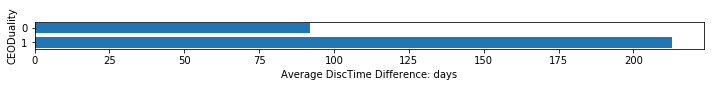

In [198]:
plt.figure(figsize=(12,0.5))

# Make dataset
height = [213,92]
bars = ('1', '0')
y_pos = np.arange(len(bars))

width = [0.7,.7]

# Create horizontal bars
plt.barh(y_pos, height, width)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Average DiscTime Difference: days")
plt.ylabel("CEODuality")
# Show graphic
plt.show()


# Announcement

In [100]:
CEODiffTime = df_t0[['BreachAnnounceDate','BreachDiscoveryDate','CEODuality']].dropna()
CEODiffTime.head()

,BreachAnnounceDate,BreachDiscoveryDate,CEODuality
966,2018-09-28 00:00:00,2018-09-28 00:00:00,1.0
1346,2018-06-15 00:00:00,2018-06-15 00:00:00,0.0
131,2018-08-28 00:00:00,2018-08-02 00:00:00,1.0
2296,2018-02-21 00:00:00,2018-01-29 00:00:00,0.0
451,2018-02-13 00:00:00,2017-12-15 00:00:00,0.0


In [122]:
import datetime
CEODiffTime = CEODiffTime[CEODiffTime['BreachAnnounceDate'].apply(lambda x: type(x) == datetime.datetime)]
CEODiffTime = CEODiffTime[CEODiffTime['BreachDiscoveryDate'].apply(lambda x: type(x) == datetime.datetime)]

In [123]:
CEODiffTime.shape

(395, 3)

In [124]:
CEODiffTime['Diff'] = CEODiffTime['BreachAnnounceDate'] - CEODiffTime['BreachDiscoveryDate']

In [127]:
CEODiffTime['Diff_'] = pd.Series(delta.days for delta in (CEODiffTime['BreachAnnounceDate'] - CEODiffTime['BreachDiscoveryDate']))


In [128]:
CEODiffTime.head()

,BreachAnnounceDate,BreachDiscoveryDate,CEODuality,Diff,Diff_
966,2018-09-28 00:00:00,2018-09-28 00:00:00,1.0,0 days,NaN
1346,2018-06-15 00:00:00,2018-06-15 00:00:00,0.0,0 days,NaN
131,2018-08-28 00:00:00,2018-08-02 00:00:00,1.0,26 days,0.0
2296,2018-02-21 00:00:00,2018-01-29 00:00:00,0.0,23 days,NaN
451,2018-02-13 00:00:00,2017-12-15 00:00:00,0.0,60 days,NaN


In [129]:
CEODiffTime.CEODuality.value_counts()

1.0    265
0.0    130
Name: CEODuality, dtype: int64

In [132]:
CEODiffTime[CEODiffTime['CEODuality']==1]['Diff'].mean()

Timedelta('202 days 02:37:35.094339')

In [133]:
CEODiffTime[CEODiffTime['CEODuality']==0]['Diff'].mean()

Timedelta('328 days 23:37:50.769230')

In [135]:
CEODiffTime.CEODuality.unique()

array([1., 0.])

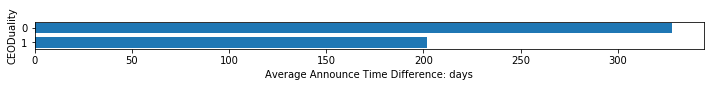

In [199]:
plt.figure(figsize=(12,0.5))

# Make dataset
height = [202,328]
bars = ('1', '0')
y_pos = np.arange(len(bars))

width = [0.7,.7]

# Create horizontal bars
plt.barh(y_pos, height, width)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Average Announce Time Difference: days")
plt.ylabel("CEODuality")
# Show graphic
plt.show()


In [18]:
whoseData = df_t0[['ConsumerData','BusinessCustomerData','EmployeeData','PartnerData','FirmIP']]
whoseData.head()

,ConsumerData,BusinessCustomerData,EmployeeData,PartnerData,FirmIP
1,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0
11,1.0,0.0,0.0,0.0,0.0
16,0.0,1.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0


In [20]:
type(whoseData.sum(axis = 0, skipna = True))

pandas.core.series.Series

# Firm Size vs Breach Type

In [398]:
# Reminder: do not use 1001 and 10001 as boundary as the size is float instead of integer
print('Small companies: ',sum((df_t0['Firm.Size']<=1000)))
print('Medium companies: ',sum(((1000<df_t0['Firm.Size']) & (df_t0['Firm.Size']<=10000))))
print('Large companies: ',sum((10000<df_t0['Firm.Size'])))

Small companies:  54
Medium companies:  169
Large companies:  248


In [399]:
print('Small companies: ',sum((df_t0['Firm.Size']<=10000)))
print('Large companies: ',sum((10000<df_t0['Firm.Size'])))
# 加起来不是486，bc还有 firm size是nan

Small companies:  223
Large companies:  248


In [400]:
sum(df_t0['Firm.Size'].isnull())

15

In [415]:
sub_t0 = df_t0[['Firm.Size','Breach.Type']].dropna()

In [416]:
sub_t0.shape

(466, 2)

In [417]:
# drop breach type = unkown
sub_t0 = sub_t0[sub_t0['Breach.Type']!='UNKN']

In [ ]:
sub_t0.head()

In [419]:
sub_t0['Firm.Size'].replace(sub_t0[sub_t0['Firm.Size']>10000]['Firm.Size'],'Large Firm',inplace=True)

In [420]:
sub_t0.head()

,Firm.Size,Breach.Type
1,506.514,HACK
11,1827.18,DISC
16,Large Firm,PORT
21,Large Firm,HACK
26,1879.6,PHYS


In [430]:
sub_t0['Firm.Size'].str.isnumeric().isnull()

1        True
11       True
16      False
21      False
26       True
31       True
36       True
41      False
46      False
51       True
56       True
61       True
66       True
71       True
76       True
81      False
86      False
91      False
96      False
101     False
106      True
111      True
116     False
121     False
126     False
136      True
141      True
146     False
151      True
156     False
        ...  
2256    False
2261     True
2266    False
2271    False
2281    False
2286    False
2291    False
2301    False
2306     True
2311     True
2316     True
2321    False
2326    False
2331    False
2336    False
2341    False
2346     True
2351     True
2356     True
2361     True
2366     True
2371     True
2376    False
2381     True
2386     True
2391     True
2396     True
2401    False
2406     True
2411     True
Name: Firm.Size, Length: 449, dtype: bool

In [436]:
sub_t0['Firm.Size'] = sub_t0['Firm.Size'].replace(xx['Firm.Size'],'Small & Medium Firm')

In [437]:
sub_t0.head(10)

,Firm.Size,Breach.Type
1,Small & Medium Firm,HACK
11,Small & Medium Firm,DISC
16,Large Firm,PORT
21,Large Firm,HACK
26,Small & Medium Firm,PHYS
31,Small & Medium Firm,HACK
36,Small & Medium Firm,HACK
41,Large Firm,HACK
46,Large Firm,DISC
51,Small & Medium Firm,HACK


In [438]:
sub_t0['Number'] = 1

In [476]:
sub_t0.head()

,Firm.Size,Breach.Type,Number
1,Small & Medium Firm,HACK,1
11,Small & Medium Firm,DISC,1
16,Large Firm,PORT,1
21,Large Firm,HACK,1
26,Small & Medium Firm,PHYS,1


In [471]:
sub_t0.shape

(449, 3)

In [480]:
BreachType.unique().tolist()

['HACK', 'DISC', 'PORT', 'PHYS', 'INSD', 'STAT', 'CARD']

In [489]:
pt = pd.pivot_table(sub_t0,index=sub_t0['Breach.Type'],columns=sub_t0['Firm.Size'],values=["Number"],
               aggfunc={np.sum},fill_value=0)
pt

Number                    
                   sum                    
Firm.Size   Large Firm Small & Medium Firm
Breach.Type                               
CARD                 8                   5
DISC                47                  34
HACK                60                  76
INSD                37                  21
PHYS                18                  12
PORT                58                  58
STAT                 7                   8

In [490]:
print(pt.columns)
pt.columns = ['Large Firm','Small & Medium Firm']
print('New Columns:', pt.columns)

MultiIndex(levels=[['Number'], ['sum'], ['Large Firm', 'Small & Medium Firm']],
           labels=[[0, 0], [0, 0], [0, 1]],
           names=[None, None, 'Firm.Size'])
New Columns: Index(['Large Firm', 'Small & Medium Firm'], dtype='object')


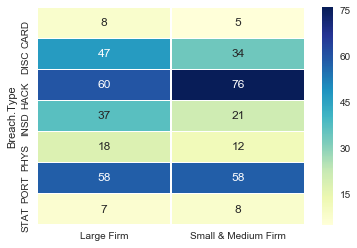

In [457]:
#Annotate each cell with the numeric value using integer formatting:
#Use a different colormap:
ax = sns.heatmap(pt, annot=True, fmt='d',linewidths=.3, cmap="YlGnBu")

In [491]:
top_typeCount = BreachType.value_counts().iloc[:4]
top_typeCount

HACK    210
PORT    156
DISC    132
INSD    105
Name: Breach.Type, dtype: int64

Large firm should take care of Insider threat and unintentional disclosure. Small and medium companies should especially pay attention to Hack.

In [4]:
industry = BreachedData[['BreachID','Name.of.Primary.SIC.industry']]
industry.head()

,BreachID,Name.of.Primary.SIC.industry
0,FLWS2016,FLORISTS
1,FLWS2016,FLORISTS
2,FLWS2016,FLORISTS
3,FLWS2016,FLORISTS
4,FLWS2016,FLORISTS


In [5]:
industry = industry.drop_duplicates(subset ="BreachID", keep = 'first') 
industry.head()

,BreachID,Name.of.Primary.SIC.industry
0,FLWS2016,FLORISTS
5,SRCE2010,COMMERCIAL AND STOCK SAVINGS BANKS
10,AAN2013,"SERVICES-EQUIPMENT RENTAL & LEASING, NEC"
15,ABT2011,PHARMACEUTICAL PREPARATIONS
20,ABT2017,PHARMACEUTICAL PREPARATIONS


In [6]:
top_industry = industry['Name.of.Primary.SIC.industry'].value_counts()[:10]
top_industry

COMMERCIAL AND STOCK SAVINGS BANKS                 40
HOSPITAL & MEDICAL SERVICE PLANS                   25
SERVICES-PREPACKAGED SOFTWARE                      21
RETAIL-DRUG STORES AND PROPRIETARY STORES          18
RETAIL-EATING PLACES                               18
PERSONAL CREDIT INSTITUTIONS                       16
TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE)       15
SECURITY BROKERS, DEALERS & FLOTATION COMPANIES    15
LIFE INSURANCE                                     11
SERVICES-COMPUTER PROCESSING & DATA PREPARATION     9
Name: Name.of.Primary.SIC.industry, dtype: int64

In [7]:
col_industry = industry['Name.of.Primary.SIC.industry']

In [8]:
col_industry = col_industry.replace('COMMERCIAL AND STOCK SAVINGS BANKS','BANKS')
col_industry = col_industry.replace('HOSPITAL & MEDICAL SERVICE PLANS','HOSPITAL')
col_industry = col_industry.replace('SERVICES-PREPACKAGED SOFTWARE','SOFTWARE')
col_industry = col_industry.replace('RETAIL-EATING PLACES','EATING PLACES')
col_industry = col_industry.replace('RETAIL-DRUG STORES AND PROPRIETARY STORES','DRUG STORES')
col_industry = col_industry.replace('PERSONAL CREDIT INSTITUTIONS','CREDIT INSTITUTIONS')
col_industry = col_industry.replace('SECURITY BROKERS, DEALERS & FLOTATION COMPANIES','SECURITY BROKERS')
col_industry = col_industry.replace('TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE)','TELEPHONE COMMUNICATIONS')
col_industry = col_industry.replace('PERSONAL CREDIT INSTITUTIONS','CREDIT INSTITUTIONS')
col_industry = col_industry.replace('SERVICES-COMPUTER PROCESSING & DATA PREPARATION','COMPUTER SERVICES')

In [9]:
sub_top_industry = col_industry.value_counts()[:10]
sub_top_industry

BANKS                       40
HOSPITAL                    25
SOFTWARE                    21
DRUG STORES                 18
EATING PLACES               18
CREDIT INSTITUTIONS         16
TELEPHONE COMMUNICATIONS    15
SECURITY BROKERS            15
LIFE INSURANCE              11
COMPUTER SERVICES            9
Name: Name.of.Primary.SIC.industry, dtype: int64

In [304]:
top_industry.index

Index(['COMMERCIAL AND STOCK SAVINGS BANKS',
       'HOSPITAL & MEDICAL SERVICE PLANS', 'SERVICES-PREPACKAGED SOFTWARE',
       'RETAIL-EATING PLACES', 'RETAIL-DRUG STORES AND PROPRIETARY STORES',
       'PERSONAL CREDIT INSTITUTIONS',
       'SECURITY BROKERS, DEALERS & FLOTATION COMPANIES',
       'TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE)', 'LIFE INSURANCE',
       'SERVICES-COMPUTER PROCESSING & DATA PREPARATION'],
      dtype='object')

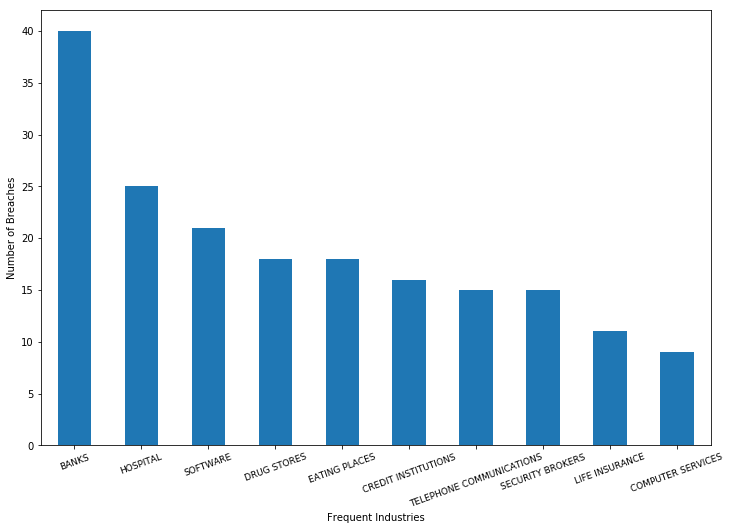

In [60]:
plt.figure(figsize=(12,8))
sub_top_industry.plot.bar()
# Create labels
label = sub_top_industry 
# Text on the top of each barplot

plt.xticks(fontsize=9, rotation=20)
plt.xlabel("Frequent Industries")
plt.ylabel("Number of Breaches")
plt.show()

In [255]:
BreachedData['Firm.Profitability'].sort_values(ascending=False)[:5]

1457    108.820513
797      36.765635
494      27.407350
2366     26.514793
519      24.570388
Name: Firm.Profitability, dtype: float64

In [256]:
# BreachedData[BreachedData['Firm.Profitability']==108.820512820513]
BreachedData[BreachedData['Firm.Profitability']==BreachedData['Firm.Profitability'].max()]

,Student.Name,Student.EID,Student.Email.address,BreachNo.,TICKER,YEAR.of.BREACH.,BreachID,Firm.Name,Year.of.Data,t,...,Advertising.Intensity,Foreign.Operations,Corporate.Restructuring,SIC.Code,Name.of.Primary.SIC.industry,CountOfSegments,Breach.Type,Type.of.organization,Total.Records,BreachDescription
1457,Morgan Brast,meb4588,morganbrast@utexas.edu,309,LMT,2011,LMT2011,LOCKHEED MARTIN CORP,2012,1,...,0.0,0.0,1.0,3761.0,GUIDED MISSILES AND SPACE VEHICLES,5.0,NaN,NaN,NaN,NaN


In [163]:
# How many entries are there for each month?
BreachedData['Name.of.Primary.SIC.industry'].value_counts()[:50]

COMMERCIAL AND STOCK SAVINGS BANKS                  200
HOSPITAL & MEDICAL SERVICE PLANS                    124
SERVICES-PREPACKAGED SOFTWARE                       105
RETAIL-EATING PLACES                                 90
RETAIL-DRUG STORES AND PROPRIETARY STORES            89
PERSONAL CREDIT INSTITUTIONS                         80
TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE)         75
SECURITY BROKERS, DEALERS & FLOTATION COMPANIES      75
LIFE INSURANCE                                       55
SERVICES-COMPUTER PROCESSING & DATA PREPARATION      45
SEMICONDUCTORS & RELATED DEVICES                     35
RETAIL-CATALOG & MAIL-ORDER HOUSES                   35
RETAIL-VARIETY STORES                                34
RETAIL-DEPARTMENT STORES                             30
PHARMACEUTICAL PREPARATIONS                          30
INVESTMENT ADVICE                                    30
SERVICES-MEDICAL LABORATORIES                        25
RETAIL-FAMILY CLOTHING STORES                   

In [164]:
sum(BreachedData['Name.of.Primary.SIC.industry'].value_counts())

2419

In [32]:
df_t0.sort_values('YEAR.of.BREACH.', ascending=False,inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_t0.head()

,Student.Name,Student.EID,Student.Email.address,BreachNo.,TICKER,YEAR.of.BREACH.,BreachID,Firm.Name,Year.of.Data,t,...,Advertising.Intensity,Foreign.Operations,Corporate.Restructuring,SIC.Code,Name.of.Primary.SIC.industry,CountOfSegments,Breach.Type,Type.of.organization,Total.Records,BreachDescription
2196,Armand Sanchez,AAS4294,mandchez@gmail.com,486,UNH,2018,UNH2018,UNITEDHEALTH GROUP INC,2018,0,...,NaN,NaN,NaN,6324.0,HOSPITAL & MEDICAL SERVICE PLANS,NaN,PHYS,MED,2350.0,Location of breached information: Paper/Films\...
966,Difu Wu,dw29999,wudifu2018@163.com,207,FB,2018,FB2018,FACEBOOK INC,2018,0,...,NaN,NaN,NaN,7375.0,SOCIAL NETWORKING,NaN,NaN,NaN,NaN,"According to the New York Times, Facebook suff..."
1346,Mason Arhelger,mba748,masonarhelger@gmail.com,285,INTU,2018,INTU2018,INTUIT INC,2018,0,...,NaN,NaN,NaN,7372.0,SERVICES-PREPACKAGED SOFTWARE,NaN,HACK,BSF,31.0,"Intuit, Inc. suffered a data breach that affec..."
131,Richa Bathija,rsb2632,richa.bathija@utexas.edu,27,AFL,2018,AFL2018,AFLAC INC,2018,0,...,NaN,NaN,NaN,6321.0,ACCIDENT & HEALTH INSURANCE,NaN,DISC,MED,14910.0,Location of breached information: Email\r\r\nB...
2296,Kenneth Tsai,kct627,kennethtsai98@gmail.com,508,WMT,2018,WMT2018,WALMART INC,2018,0,...,NaN,NaN,NaN,5331.0,RETAIL-VARIETY STORES,NaN,DISC,MED,3807.0,Location of breached information: Electronic M...


In [36]:
ICP = df_t0[['Name.of.Primary.SIC.industry','CyberPreparedness']]
ICP.head()

,Name.of.Primary.SIC.industry,CyberPreparedness
2196,HOSPITAL & MEDICAL SERVICE PLANS,0.0
966,SOCIAL NETWORKING,1.0
1346,SERVICES-PREPACKAGED SOFTWARE,1.0
131,ACCIDENT & HEALTH INSURANCE,0.0
2296,RETAIL-VARIETY STORES,1.0


In [40]:
ICPgrp = ICP.groupby('Name.of.Primary.SIC.industry')

In [59]:
type(ICPgrp.describe().CyberPreparedness['count'].sort_values(ascending=False).head(10))

pandas.core.series.Series

In [61]:
top_ICPgrp = ICPgrp.describe().CyberPreparedness['count'].sort_values(ascending=False).head(10)
top_ICPgrp

Name.of.Primary.SIC.industry
COMMERCIAL AND STOCK SAVINGS BANKS                 40.0
HOSPITAL & MEDICAL SERVICE PLANS                   25.0
SERVICES-PREPACKAGED SOFTWARE                      21.0
RETAIL-DRUG STORES AND PROPRIETARY STORES          18.0
RETAIL-EATING PLACES                               18.0
PERSONAL CREDIT INSTITUTIONS                       16.0
TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE)       15.0
SECURITY BROKERS, DEALERS & FLOTATION COMPANIES    15.0
LIFE INSURANCE                                     11.0
SERVICES-COMPUTER PROCESSING & DATA PREPARATION     8.0
Name: count, dtype: float64

In [70]:
top_ICPgrp.index

Index(['COMMERCIAL AND STOCK SAVINGS BANKS',
       'HOSPITAL & MEDICAL SERVICE PLANS', 'SERVICES-PREPACKAGED SOFTWARE',
       'RETAIL-DRUG STORES AND PROPRIETARY STORES', 'RETAIL-EATING PLACES',
       'PERSONAL CREDIT INSTITUTIONS',
       'TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE)',
       'SECURITY BROKERS, DEALERS & FLOTATION COMPANIES', 'LIFE INSURANCE',
       'SERVICES-COMPUTER PROCESSING & DATA PREPARATION'],
      dtype='object', name='Name.of.Primary.SIC.industry')